In [1]:
import pandas as pd
csv_names = ['test_data_2018.csv', 'test_data_2019.csv', 'test_data_2020.csv']

In [2]:
def get_data():
    df = pd.DataFrame()
    for csv in csv_names:
        df = df.append(pd.read_csv(csv))
    return df[['Game_ID', 'Team', 'Opp', 'Date','Season', '3 Game', 'Last Game', 'Opp Season', 
               'Opp 3 Game', 'Opp Last Game', 'Points', 'Team_ID', 'Opp_ID']].dropna()

df=get_data()

In [15]:
df = df[['Season', '3 Game', 'Opp Season', 'Opp 3 Game', 'Points']]

In [16]:
def features_targets(df):
    return df[['Season', '3 Game', 'Opp Season', 'Opp 3 Game']], df.Points

In [17]:
features, target = features_targets(df)

In [18]:
sample_df = df.sample(frac=.1, random_state=3000)

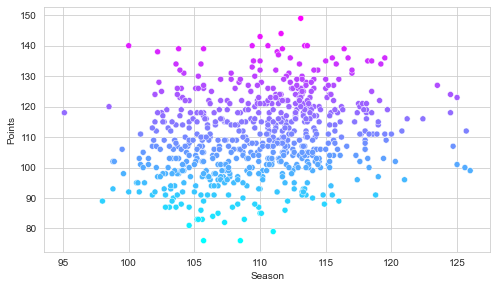

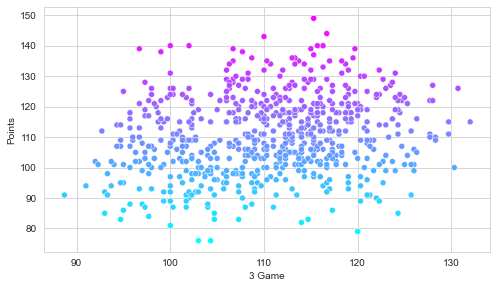

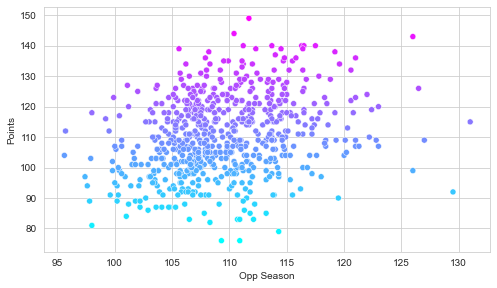

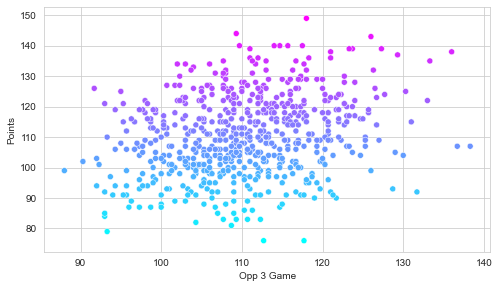

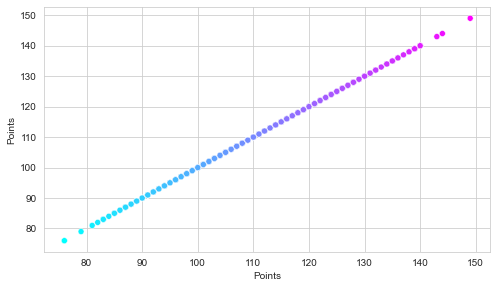

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

for feature in sample_df.columns:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, y='Points', hue='Points', palette='cool', legend=False)

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

# Ridge model tries to minimize square of coefficients
# higher alpha forces coefficiencts to be closer to zero
model = Ridge(170).fit(X=X_train, y=y_train)

print("R-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
print("R-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))

R-squared value for training set:  0.1358178339892252
R-squared value for testing set:  0.11546089361417677
